# House Sales Task 6.2 Exploring relationships

## Contents
    01.Importing Libraries & Data
    02.Correlations
    03.Scatterplots
    04.Pair Plots
    05.Categorical Plots
    06.Questions & Answers
    07.Hypothesis
    08.Exporting Data

### 01.Importing Libraries & Data

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#defining path to project folder
path=r'C:\Users\rache\Documents\House Sales Analysis'

In [3]:
#importing house_sales_data_upd.csv
df=pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'house_sales_data_upd.csv'), index_col=False)

In [4]:
#Ensures the charts created are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [5]:
df.columns

Index(['Index', 'id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### 02.Correlations

In [18]:
#creating subset excluding non-numerical variables
sub = df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors',
          'condition','sqft_basement','yr_built','zipcode','Home Size Category']]
sub

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_basement,yr_built,zipcode,Home Size Category
0,221900,3,1.00,1180,5650,1.0,3,0,1955,98178,Small
1,538000,3,2.25,2570,7242,2.0,3,400,1951,98125,Moderate
2,180000,2,1.00,770,10000,1.0,3,0,1933,98028,Small
3,604000,4,3.00,1960,5000,1.0,5,910,1965,98136,Moderate
4,510000,3,2.00,1680,8080,1.0,3,0,1987,98074,Small
...,...,...,...,...,...,...,...,...,...,...,...
21608,360000,3,2.50,1530,1131,3.0,3,0,2009,98103,Small
21609,400000,4,2.50,2310,5813,2.0,3,0,2014,98146,Moderate
21610,402101,2,0.75,1020,1350,2.0,3,0,2009,98144,Small
21611,400000,3,2.50,1600,2388,2.0,3,0,2004,98027,Small


In [8]:
#creating a correlation matrix
sub.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_basement,yr_built,zipcode
price,1.000000,0.315438,0.525138,0.702035,0.089661,0.256794,0.036362,0.323816,0.054012,-0.053203
bedrooms,0.315438,1.000000,0.529163,0.591471,0.032811,0.181098,0.025428,0.309473,0.159180,-0.157100
bathrooms,0.525138,0.529163,1.000000,0.754665,0.087740,0.500653,-0.124982,0.283770,0.506019,-0.203866
sqft_living,0.702035,0.591471,0.754665,1.000000,0.172826,0.353949,-0.058753,0.435043,0.318049,-0.199430
sqft_lot,0.089661,0.032811,0.087740,0.172826,1.000000,-0.005201,-0.008958,0.015286,0.053080,-0.129574
floors,0.256794,0.181098,0.500653,0.353949,-0.005201,1.000000,-0.263768,-0.245705,0.489319,-0.059121
condition,0.036362,0.025428,-0.124982,-0.058753,-0.008958,-0.263768,1.000000,0.174105,-0.361417,0.003026
sqft_basement,0.323816,0.309473,0.283770,0.435043,0.015286,-0.245705,0.174105,1.000000,-0.133124,0.074845
yr_built,0.054012,0.159180,0.506019,0.318049,0.053080,0.489319,-0.361417,-0.133124,1.000000,-0.346869
zipcode,-0.053203,-0.157100,-0.203866,-0.199430,-0.129574,-0.059121,0.003026,0.074845,-0.346869,1.000000


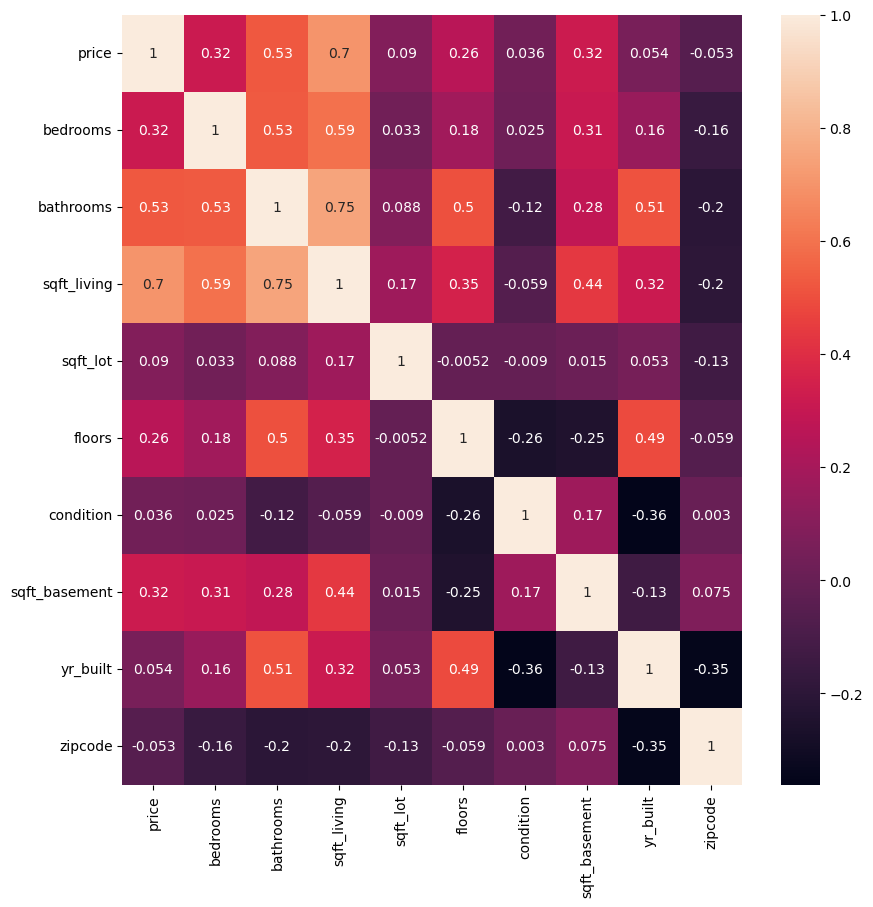

In [9]:
#creating a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

#creating the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

The correlation heatmap  tells me that the strongest correlation exists between sqft_living and bathrooms as well as sqft_living and price. Both of these relationships make sense when you consider what most people look for when buying a home--enough space, and when you have more space normally you can expect more bathrooms! It surprised me that the relationship between price and bedrooms was not stronger. I thought that would be a key factor but there is still a relationship there, just not as strong. 

The strongest negative relationships are between yr_built and zipcode as well as condition. These make sense as well.  Some areas will have older homes in them and most homes in that area will be around the same age.  The condition of older homes would be expected to be a bit worse than newer ones as well. 

### 03.Scatterplots

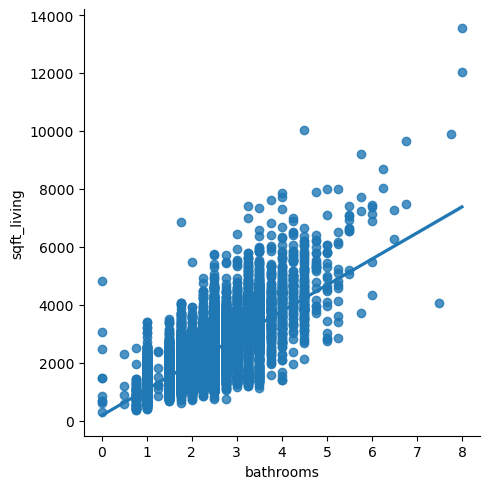

In [10]:
#creating the scatterplot for the variables with the strongest correlation
#bathrooms to sqft_living have highest correlation at 0.75
sns.lmplot(x = 'bathrooms', y = 'sqft_living', data = df)

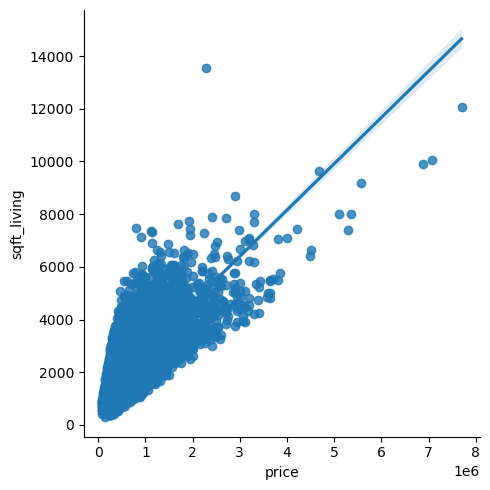

In [11]:
#creating the scatterplot for the variables with the strongest correlation
#price to sqft_living have next highest correlation at 0.70
sns.lmplot(x = 'price', y = 'sqft_living', data = df)

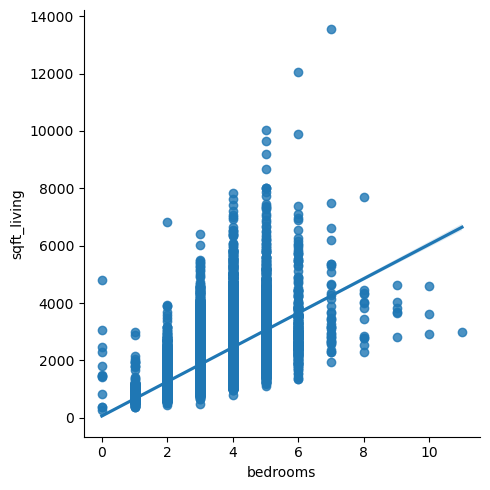

In [12]:
#creating the scatterplot for the variables with the strongest correlation
#bedrooms to sqft_living have third highest correlation at 0.58.
sns.lmplot(x = 'bedrooms', y = 'sqft_living', data = df)

All these scatterpolots show a strong relationship (all are 0.5 or more correlation) between their variables. As square footage goes up so does the price, number of bathrooms, and number of bedrooms. 

### 04.Pair Plots

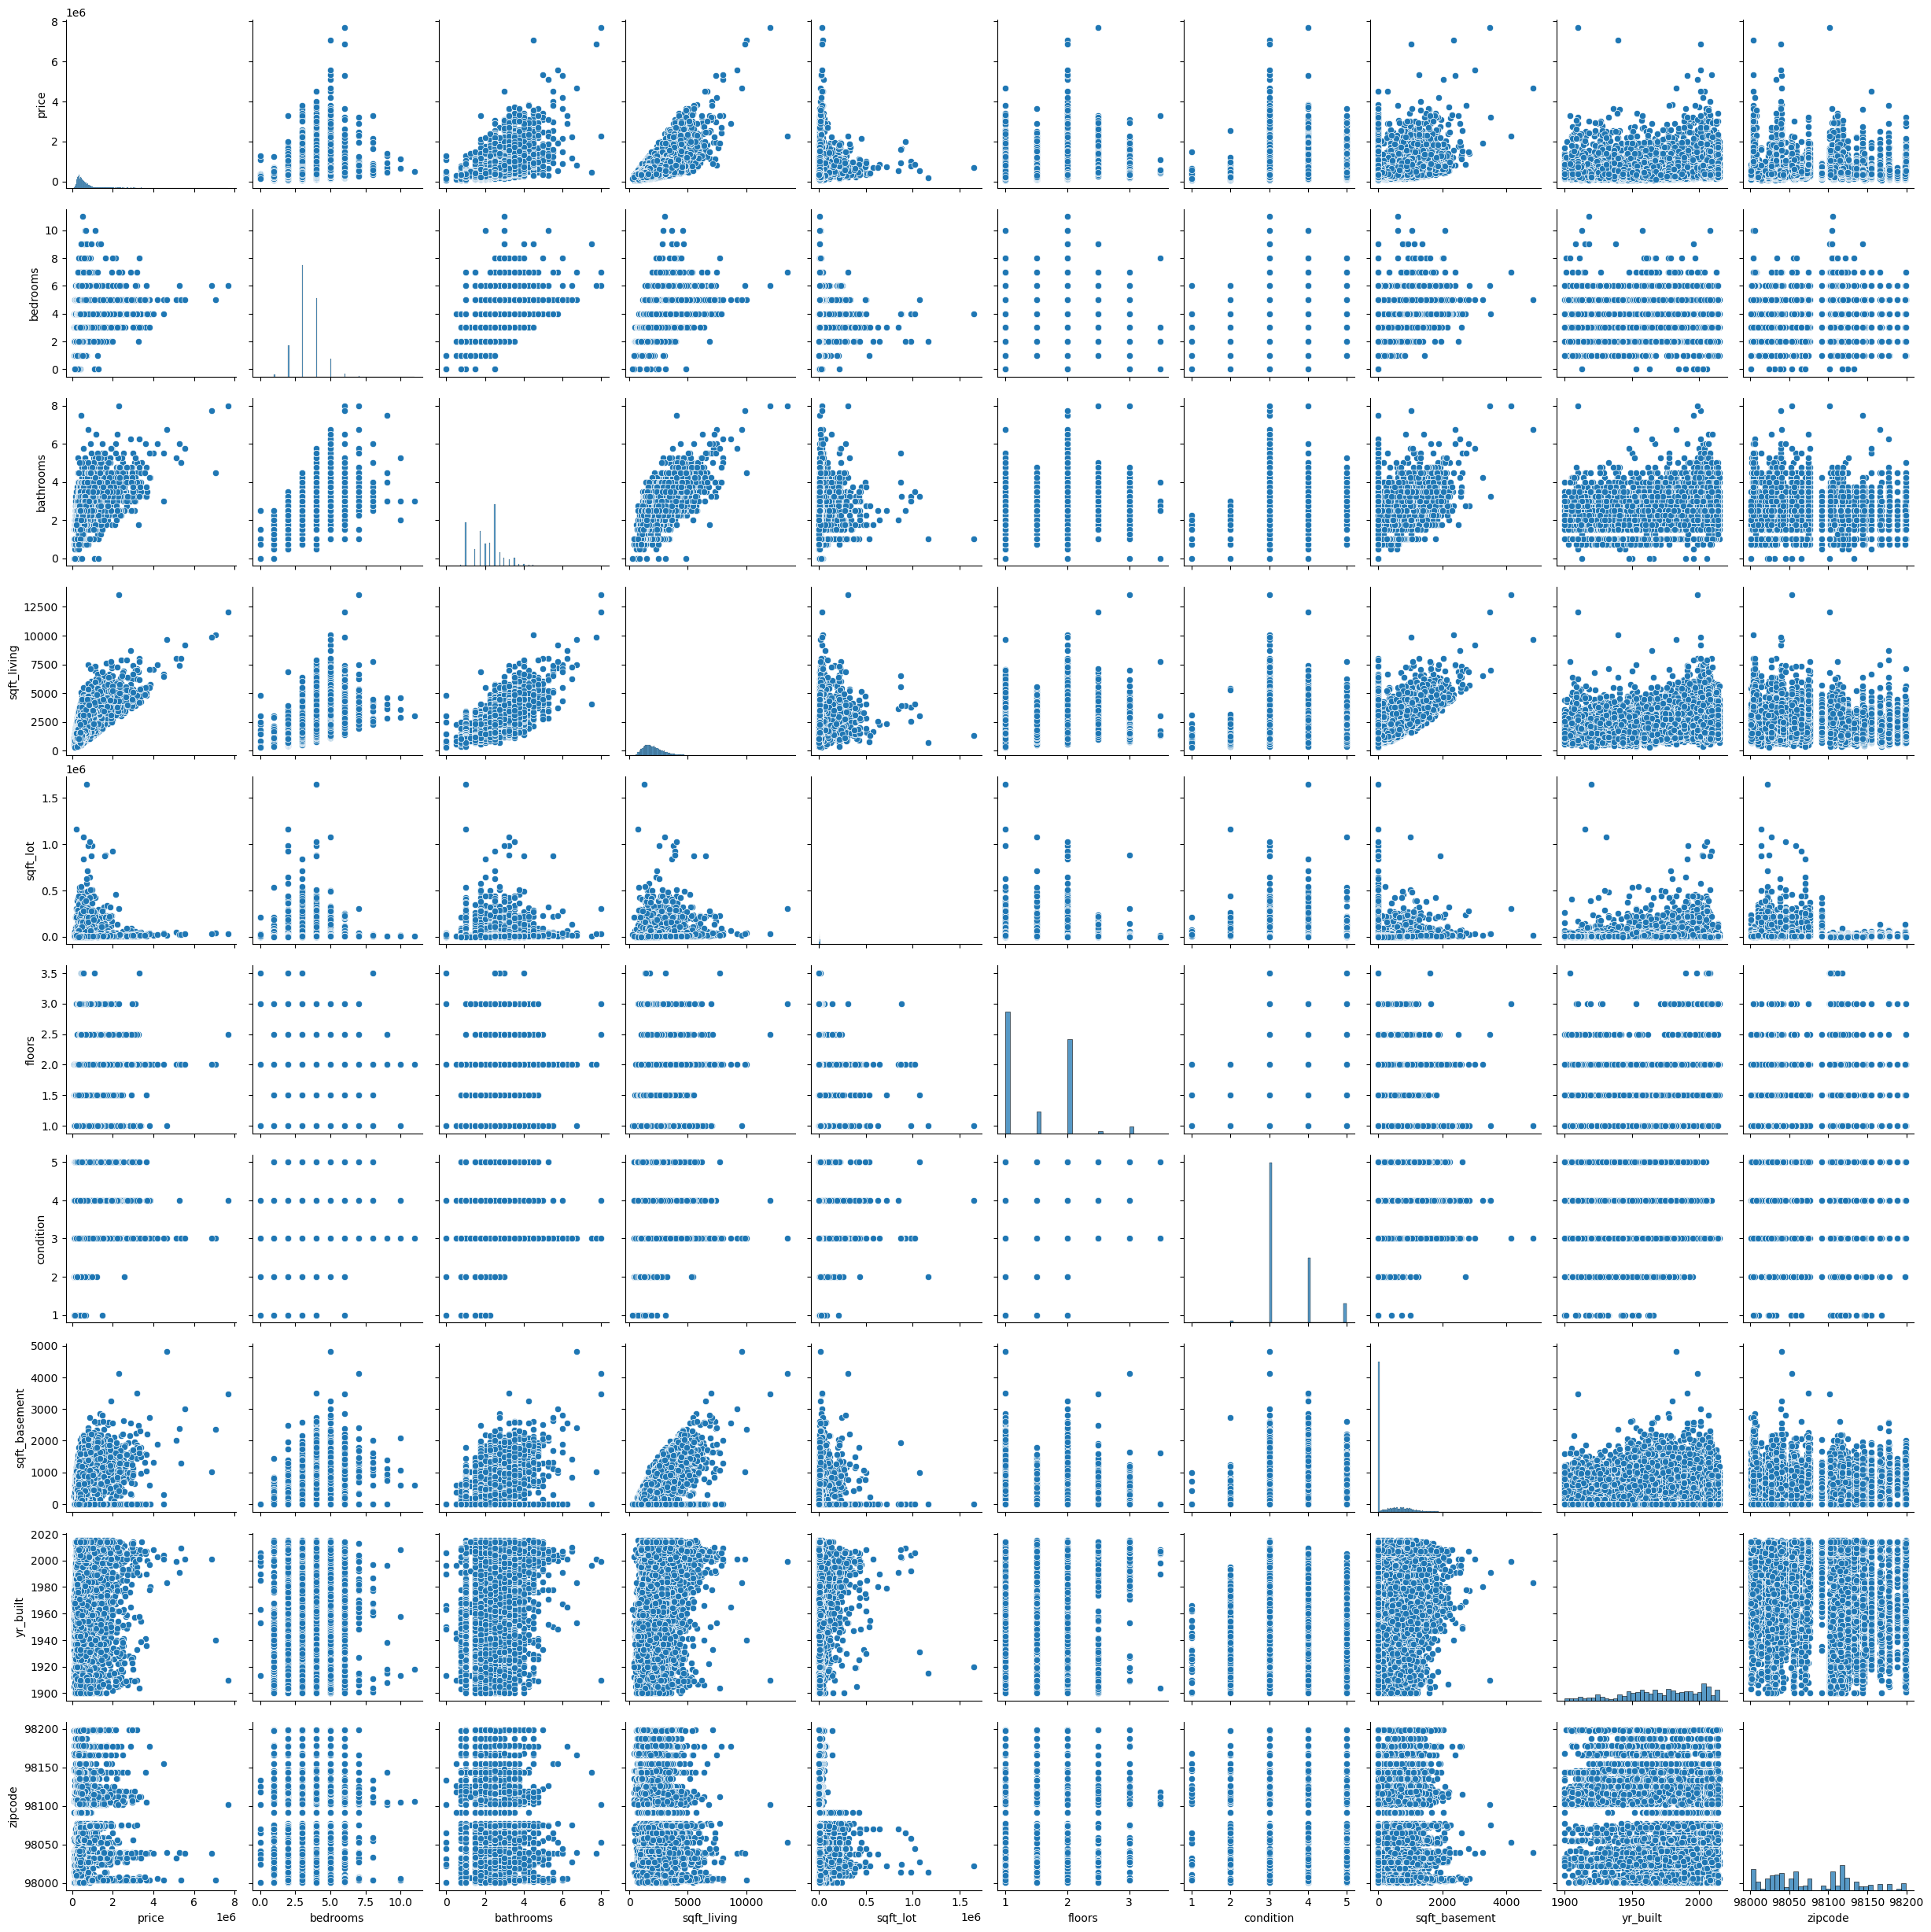

In [13]:
#creating pair plot from subset of data
g = sns.pairplot(sub)

As previously stated, this shows the correlation between the same few variables: when square footage goes up so does the price, number of bathrooms, and number of bedrooms.  This also does show a relationship between sqft_living and sqft_basement which would make sense.

### 05.Categorical Plots

<AxesSubplot:xlabel='price', ylabel='Count'>

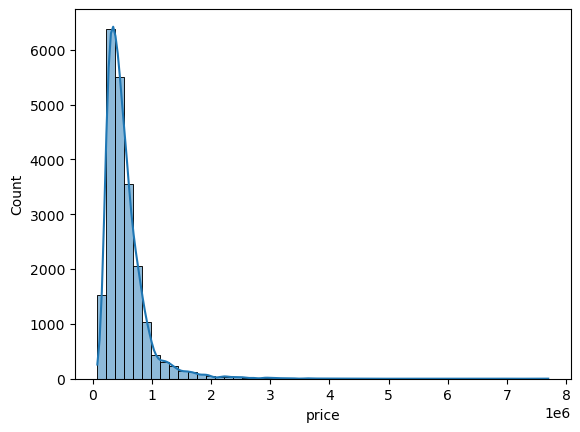

In [14]:
#creating a histogram of prices to visualize the distribution
sns.histplot(df['price'],bins=50,kde=True)

<AxesSubplot:xlabel='sqft_living', ylabel='Count'>

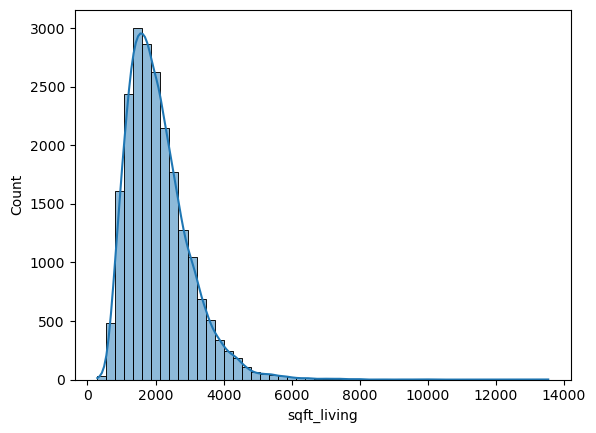

In [15]:
#creating a histogram of sqft_living to visualize the distribution
sns.histplot(df['sqft_living'],bins=50,kde=True)

In [16]:
#creating a categorical variable for 'sqft_living' with categories for Small, Moderate, and Large home sizes
df.loc[df['sqft_living'] <1800, 'Home Size Category'] = 'Small'
df.loc[(df['sqft_living'] >=1800) & (df['sqft_living'] <3000), 'Home Size Category'] = 'Moderate'
df.loc[df['sqft_living'] >=3000, 'Home Size Category'] = 'Large'
# Checking the distribution of the Home_Size variable 
df['Home Size Category'].value_counts(dropna = False)

Small       9554
Moderate    8937
Large       3122
Name: Home Size Category, dtype: int64

In [23]:
df.columns

Index(['Index', 'id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Home Size Category'],
      dtype='object')

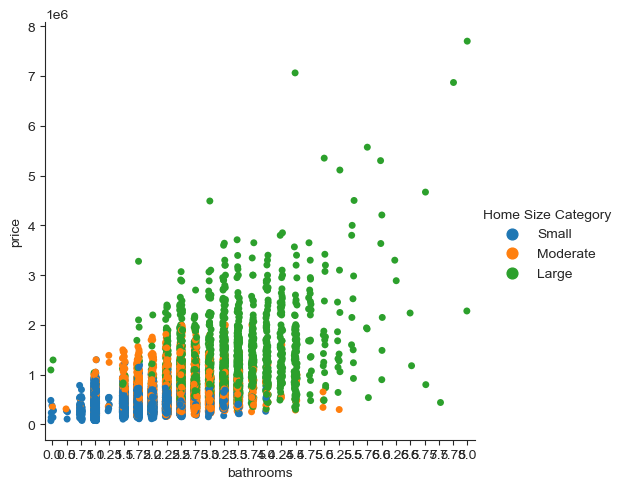

In [27]:
#creating a categorical plot in seaborn using the Home Size categories created above
sns.set_style("ticks")
catplot=sns.catplot(x="bathrooms", y="price", hue="Home Size Category",data=df)

In most cases, homes in the large size category have more bathrooms.  The price of those homes does vary quite a bit though which I found interesting. 

### 06.Questions & Answers

•	What characteristics do the highest priced homes have? 
    
    More square footage, more bathrooms, better condition

### 07.Hypothesis

    The more square footage a home has, the more bathrooms it will have.
    The more square footage a home has, the price it will sell at will be higher.
    As the size of the lot gets bigger, the price gets smaller.

### 08.Exporting Data

In [28]:
g.savefig("pairplot.png") 
catplot.savefig("catplot.png")

In [30]:
#exporting data to pkl
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'house_sales_upd2.pkl'))